# Análise sobre a Venda de Jogos de Plataformas de Videogames - Loja Ice 

# Conteúdo <a id='back'></a>

* [1) Introdução](#intro)
* [2) Objetivo do Projeto](#projectgoal)
* [3) Preparação de Dados](#data_preprocessing)
* [4) Análise Total de Vendas](#salesanalysis)
* [5) Análise das Plataformas](#plataformsanalysis)
* [6) A Influência das Avaliações nas Vendas](#salesinfluency)
* [7) Os Gêneros Preferidos dos Consumidores](#genrespreference)
* [8) Venda das Plataformas por Região (NA, EU, JP)](#salesperregion)
* [9) Classificações ERSB (Entertainment Software Rating Board)](#ERSB)
* [10) Formulação das Hipóteses](#hypothesesform)
* [11) Testando Hipóteses](#hypothesestest)
* [12) Conclusão Geral](#end)

# Introdução

A loja online Ice, vende jogos para plataformas de videogames no mundo todo. Através das avaliações de usuários e especialistas, dados históricos, gêneros, plataformas como Xbox, Playstation, Wii, entre outras, vamos analisar e identificar padrões que determinam se um jogo possíveis sucessos de vendas, possibilitando o planejamento de campanhas publicitárias para os próximos anos.

# Objetivo do Projeto 

O objetivo deste projeto será analisar um conjunto de dados de jogos, abordando diversos aspectos das vendas e classificações de jogos em diferentes plataformas e gêneros, com um foco especial nas seguintes áreas:

- Variação das vendas de jogos por plataforma;
- Identificação das plataformas líderes em diferentes regiões;
- Avaliação do impacto das classificações ESRB nas vendas;
- Comparação das classificações médias dos usuários entre diferentes gêneros e plataformas;
- Análise da influência das classificações dos usuários e críticos nas vendas.

# Preparação de Dados

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats # Carregando todas as bibliotecas

In [2]:
games_df = pd.read_csv('/datasets/games.csv', sep = ',', decimal='.') # Carregando o arquivo de dados em DataFrame

In [3]:
games_df.info() # Imprimindo as informações gerais/resumidas sobre o DataFrame de games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df.head(10) # Imprimindo uma amostra de dados dos games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
print(games_df.columns) #Imprimindo os nomes das colunas

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Conforme as boas práticas de estilo, vamos transformar os nomes das colunas em letras minúsculas para evitar erros.

In [6]:
new_col_names = []

for old_name in games_df.columns:
    name_lowered = old_name.lower()
    new_col_names.append(name_lowered)
    
games_df.columns = new_col_names
    
print(games_df.columns) #Substituindo os nomes das colunas (transformando tudo em minúsculos)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
print(games_df.isna().sum()) #calculando o número de valores ausentes

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Os valores ausentes estão presentes pelas possíveis razões de desconhecimento dos dados, dados a serem preenchidos ou por falha nos preenchimentos de dados. De qualquer modo, deixaremos os valores ausentes presentes no DataFrame para que não seja introduzido nenhum viés. 

In [8]:
games_df['year_of_release'].fillna(0, inplace=True)

In [9]:
games_df['year_of_release'] = games_df['year_of_release'].astype('int') #Transformando os dados de ano de lançamento para número inteiro.Descreva as colunas onde os tipos de dados foram alterados e por quê. 

In [10]:
games_df['year_of_release'].dtype

dtype('int64')

In [11]:
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

In [12]:
print(games_df.duplicated().sum()) #Contando duplicados explícitos

0


Não há valores duplicados no arquivo de dados.

# Análise Total de Vendas

In [13]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
print(games_df['total_sales'].head()) #Calculando o total de vendas (em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64


In [14]:
yearly_releases = games_df['year_of_release'].value_counts().sort_index()
print(yearly_releases)

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


Os dados mostram um aumento significativo no número de jogos lançados a partir da década de 1990, atingindo um pico em 2008. Após isso, há uma ligeira diminuição nos lançamentos anuais até 2016.

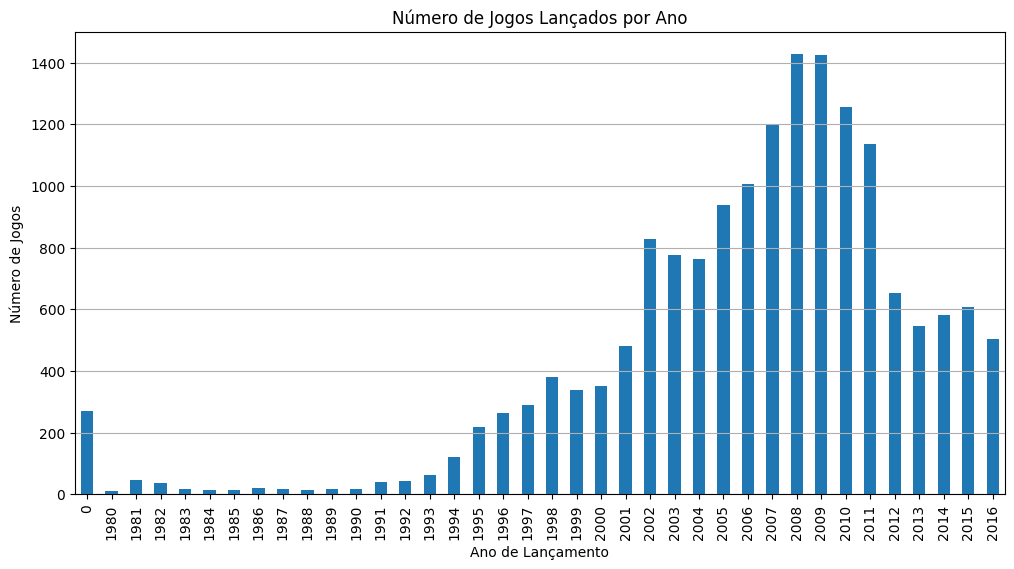

In [15]:
plt.figure(figsize=(12, 6))
yearly_releases.plot(kind='bar')
plt.title('Número de Jogos Lançados por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.grid(axis='y')
plt.show() #Plotando a contagem de jogos lançados por ano

O gráfico mostra claramente a evolução do número de lançamentos de jogos ao longo dos anos. A partir da década de 1980, observa-se um crescimento gradual, que se acelera na década de 2000, com o seu pico em 2008. Após 2008, há uma queda gradual nos lançamentos até 2016.

In [16]:
games_df = games_df.dropna(subset=['year_of_release']) #Removendo registros com anos ausentes e filtrar dados relevantes
games_df = games_df[(games_df['year_of_release'] >= 2013) & (games_df['year_of_release'] <= 2016)]  #Considerando dados de 2013 até 2016


In [17]:
yearly_releases = games_df['year_of_release'].value_counts().sort_index() #Contando o número de jogos lançados por ano

In [18]:
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


Vendas Totais por Plataforma.

In [19]:
top_platforms = platform_sales.head(5).index
print(top_platforms)

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360'], dtype='object', name='platform')


As 5 plataformas com mais vendas.

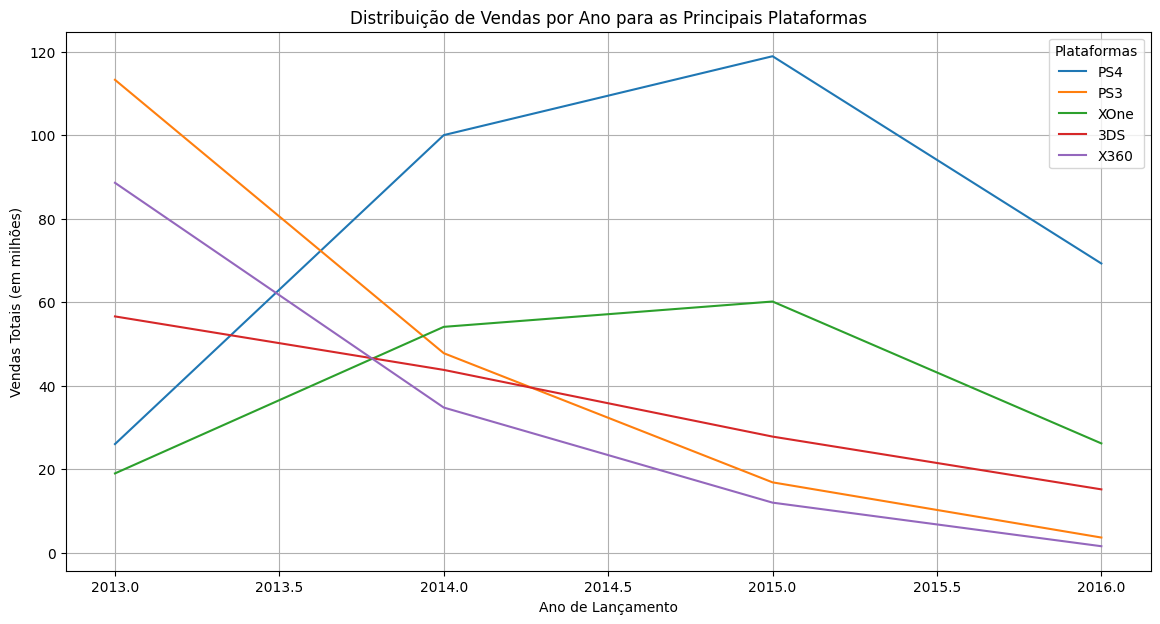

In [20]:
filtered_data = games_df[games_df['platform'].isin(top_platforms)]

plt.figure(figsize=(14, 7))

for platform in top_platforms:
    platform_data = filtered_data[filtered_data['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.title('Distribuição de Vendas por Ano para as Principais Plataformas')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.legend(title='Plataformas')
plt.grid(True)
plt.show()

O gráfico oferece uma visão clara das tendências e padrões de vendas ao longo do tempo para as principais plataformas de jogos. Podemos identificar anos em que cada plataforma teve picos de vendas. Esses picos geralmente coincidem com lançamentos de jogos populares ou novos modelos de hardware. As plataformas também mostram declínios nas vendas após atingirem o pico, o que pode ser devido ao surgimento de novas tecnologias ou à diminuição do interesse dos consumidores.

# Análise das Plataformas

In [21]:
last_year_sales = games_df.groupby('platform')['year_of_release'].max()
inactive_platforms = last_year_sales[last_year_sales >= 2013]

print(inactive_platforms) #Identificando quando as plataformas parara de ter novas vendas

platform
3DS     2016
DS      2013
PC      2016
PS3     2016
PS4     2016
PSP     2015
PSV     2016
Wii     2016
WiiU    2016
X360    2016
XOne    2016
Name: year_of_release, dtype: int64


In [22]:
platform_lifetime = games_df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min']

print(platform_lifetime) #Calculando a diferença de anos entre o primeiro e o último lançamento para cada plataforma

           min   max  lifetime
platform                      
3DS       2013  2016         3
DS        2013  2013         0
PC        2013  2016         3
PS3       2013  2016         3
PS4       2013  2016         3
PSP       2013  2015         2
PSV       2013  2016         3
Wii       2013  2016         3
WiiU      2013  2016         3
X360      2013  2016         3
XOne      2013  2016         3


Foi determinado que o período em análise será entre 2013 e 2016, para mapeamento de um modelo para o ano de 2017. 

In [23]:
growth_decline = {}
for platform in top_platforms:
    platform_data = filtered_data[filtered_data['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    growth_decline[platform] = (yearly_sales.iloc[-1] - yearly_sales.iloc[0]) / yearly_sales.iloc[0]

print(growth_decline) #Analisando crescimento ou declínio de vendas por plataforma

{'PS4': 1.6644863409003465, 'PS3': -0.9682119205298013, 'XOne': 0.3792194092827019, '3DS': -0.7323669789641154, 'X360': -0.9828403702867465}


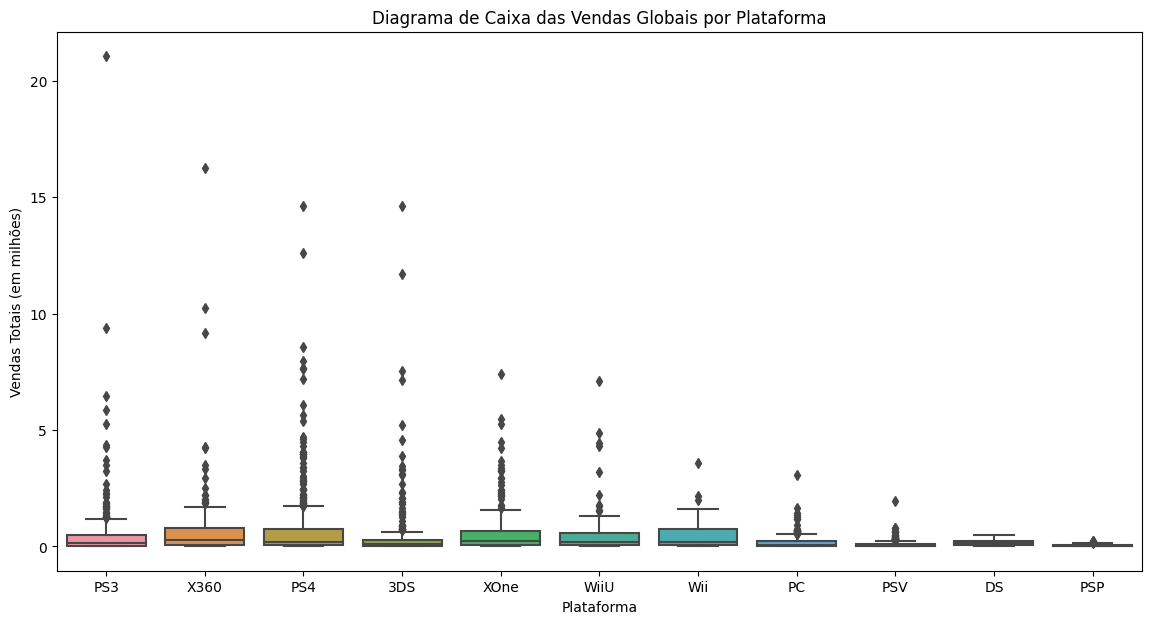

In [24]:
plt.figure(figsize=(14, 7))

sns.boxplot(x='platform', y='total_sales', data=games_df)
plt.title('Diagrama de Caixa das Vendas Globais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.show() #Construindo um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma

A linha central em cada caixa representa a mediana das vendas globais para cada plataforma. Comparando as medianas entre plataformas, podemos identificar quais plataformas têm, em média, vendas mais altas. A altura da caixa indica a dispersão das vendas. Plataformas com caixas mais altas têm maior variação nas vendas dos jogos.Pontos individuais fora dos bigodes indicam outliers, ou seja, jogos que venderam significativamente mais (ou menos) do que a maioria dos jogos na mesma plataforma.

    
O console PS3 se destaca com números muito altos, ultrapassando 20 milhões em vendas globais. X360, PS4 e 3DS apresentam números semelhantes de vendas, solidificando a linha Playstation e seus vários modelos ao longo dos anos, que consolidaram a marca junto às maiores plataformas de games. 



# A Influência das Avaliações nas Vendas 

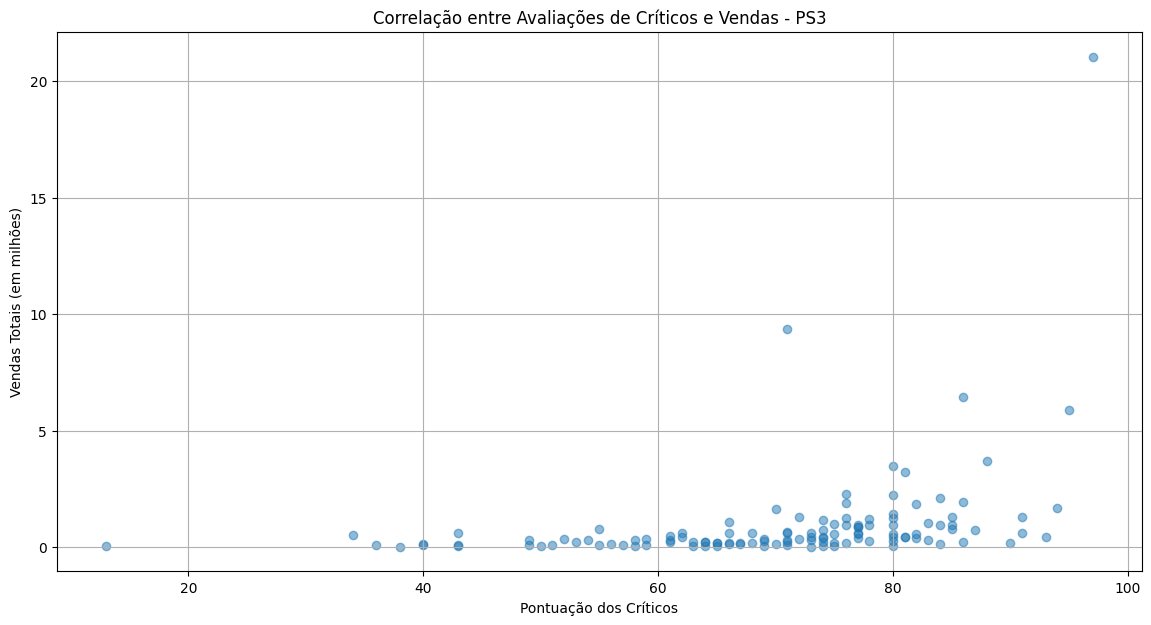

In [25]:
platform = 'PS3'
platform_data = games_df[games_df['platform'] == platform]# Escolhendo uma plataforma popular (PS2)


plt.figure(figsize=(14, 7))
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.5)
plt.title('Correlação entre Avaliações de Críticos e Vendas - PS3')
plt.xlabel('Pontuação dos Críticos')
plt.ylabel('Vendas Totais (em milhões)')
plt.grid(True)
plt.show() #Construindo um gráfico de dispersão para avaliações de críticos e vendas

In [26]:
correlation_critic = platform_data['critic_score'].corr(platform_data['total_sales'])
print(f'Correlação entre Pontuação dos Críticos e Vendas (PS3): {correlation_critic}') #Calculando a correlação entre avaliações de crítcos e vendas

Correlação entre Pontuação dos Críticos e Vendas (PS3): 0.3342853393371919


A correlação de 0.3342853393371919 entre a pontuação dos críticos e as vendas dos jogos na plataforma PS3 parece ter um impacto moderado nas vendas dos jogos. Isso sugere que, embora não seja o único fator, as avaliações dos críticos influenciam as decisões de compra dos consumidores, possivelmente devido à confiança que os consumidores depositam nesses críticos.

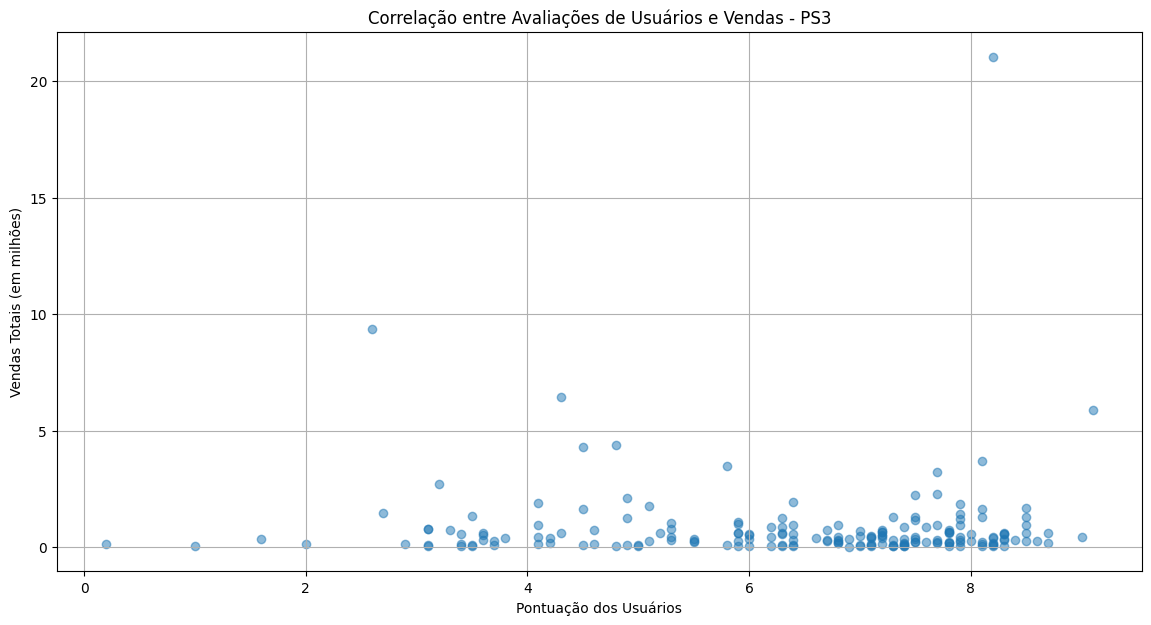

In [27]:
plt.figure(figsize=(14, 7))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5)
plt.title('Correlação entre Avaliações de Usuários e Vendas - PS3')
plt.xlabel('Pontuação dos Usuários')
plt.ylabel('Vendas Totais (em milhões)')
plt.grid(True)
plt.show() #Construindo um gráfico de dispersão para avaliações de usuários e vendas

In [28]:

correlation_user = platform_data['user_score'].corr(platform_data['total_sales'])
print(f'Correlação entre Pontuação dos Usuários e Vendas (PS3): {correlation_user}') #Calculando a correlação entre avaliações e vendas

Correlação entre Pontuação dos Usuários e Vendas (PS3): 0.0023944027357566925


A correlação de 0.0023944027357566925 entre a pontuação dos usuários e as vendas dos jogos na plataforma PS3 está muito próximo de 0. Isso sugere que não há praticamente nenhuma correlação linear entre a pontuação dos usuários e as vendas dos jogos de PS3. As decisões de compra dos consumidores de jogos de PS3 não são fortemente influenciadas pelas avaliações dos usuários.

In [29]:

same_games = games_df[games_df['name'].isin(platform_data['name'])]
comparison = same_games.groupby(['name', 'platform'])['total_sales'].sum().unstack()

print(comparison)#Comparando vendas dos mesmos jogos em outras plataformas

platform                                   3DS  DS  PC   PS3   PS4   PSP  \
name                                                                       
2014 FIFA World Cup Brazil                 NaN NaN NaN  0.61   NaN   NaN   
3rd Super Robot Wars Z Jigoku Hen          NaN NaN NaN  0.23   NaN   NaN   
3rd Super Robot Wars Z: Tengoku-Hen        NaN NaN NaN  0.15   NaN   NaN   
AKB1/149: Love Election                    NaN NaN NaN  0.08   NaN   NaN   
Accel World: Kasoku no Chouten             NaN NaN NaN  0.02   NaN  0.01   
...                                        ...  ..  ..   ...   ...   ...   
Yakuza Zero: The Place of Oath             NaN NaN NaN  0.25  0.17   NaN   
Yakuza: Ishin                              NaN NaN NaN  0.26  0.15   NaN   
Yoru no Nai Kuni                           NaN NaN NaN  0.05  0.08   NaN   
Young Justice: Legacy                     0.03 NaN NaN  0.09   NaN   NaN   
Zillions of Enemy X: Zetsukai no Crusade   NaN NaN NaN  0.02   NaN   NaN   

platform   

O dataframe same_games contém as vendas totais de jogos que estão disponíveis em múltiplas plataformas. A variável comparison foi criada agrupando as vendas totais por jogo e plataforma, e depois reorganizada para facilitar a visualização das comparações. A comparação revela como diferentes jogos se comportam em termos de vendas em diversas plataformas. 

# Os Gêneros Preferidos dos Consumidores

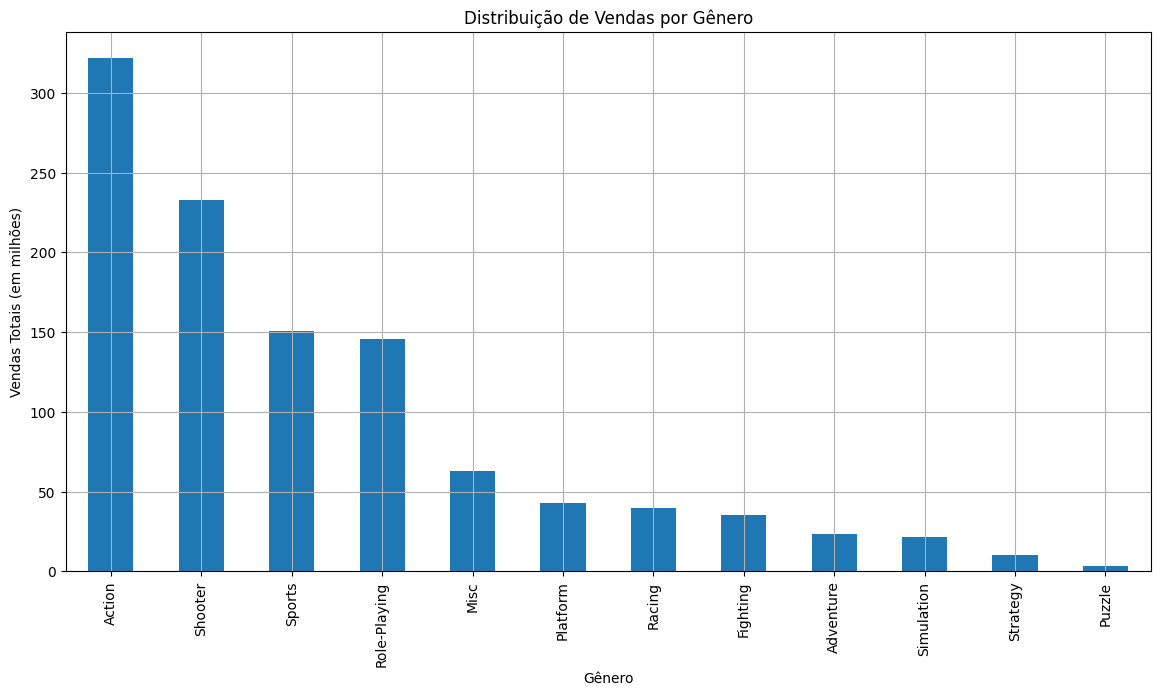

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64


In [30]:
genre_sales = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
genre_sales.plot(kind='bar')
plt.title('Distribuição de Vendas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.grid(True)
plt.show()

print(genre_sales) #Analisando a distribuição geral de jogos por gênero

Jogos de ação lideram as vendas globais, indicando um apelo universal devido à sua jogabilidade intensa e variada. Jogos de tiro continuam a ser uma força dominante no mercado de jogos. Já a presença constante dos jogos de esportes entre os principais gêneros em todas as regiões destaca seu apelo universal, provavelmente pelos títulos futebolísticos (aqui precisaria ter mais dados pra confirmar essa hipótese).E os RPGs mantêm uma forte base de fãs devido às suas histórias ricas e jogabilidade imersiva, com maior popularidade no Japão.

# Venda das Plataformas por Região (NA, EU, JP)

In [31]:
na_sales = games_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False) 

top_platforms_na = na_sales.head(5)

print(top_platforms_na) #Calculando as vendas totais na região NA por plataforma

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64


In [32]:
eu_sales = games_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False) 

top_platforms_eu = eu_sales.head(5)

print(top_platforms_eu) #Calculando as vendas totais na região EU por plataforma

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


In [33]:
jp_sales = games_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False) 

top_platforms_jp = jp_sales.head(5)

print(top_platforms_jp) #Calculando as vendas totais na região JP por plataforma

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


In [34]:
region_sales = games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
print(region_sales) #Calculando as vendas totais por plataforma em cada região

          na_sales  eu_sales  jp_sales
platform                              
3DS          38.20     30.96     67.81
DS            0.57      0.85      0.00
PC           11.11     25.36      0.00
PS3          63.50     67.81     23.35
PS4         108.74    141.09     15.96
PSP           0.00      0.17      3.29
PSV           5.04      6.10     18.59
Wii           6.56      5.93      0.05
WiiU         29.21     19.85     10.88
X360         81.66     42.52      0.51
XOne         93.12     51.59      0.34


Cada região tem suas próprias preferências, com a América do Norte favorecendo o PS4 e Xbox 360, a Europa favorecendo as plataformas PlayStation e XBox em seguida, e o Japão favorecendo os consoles móveis da Nintendo (3DS).

In [35]:
region_sales['global_sales'] = region_sales.sum(axis=1) #Calculando as vendas globais para cada plataforma

In [36]:

region_sales['na_share'] = region_sales['na_sales'] / region_sales['global_sales']* 100
region_sales['eu_share'] = region_sales['eu_sales'] / region_sales['global_sales']* 100
region_sales['jp_share'] = region_sales['jp_sales'] / region_sales['global_sales']* 100

#Calculando a quota de mercado de cada plataforma em cada região


In [37]:
region_sales = region_sales.sort_values(by='global_sales', ascending=False).round(2)
#Ordenando por vendas globais para ver as plataformas principais

In [38]:
print(region_sales[['na_share', 'eu_share', 'jp_share']])

          na_share  eu_share  jp_share
platform                              
PS4          40.91     53.08      6.00
PS3          41.06     43.84     15.10
XOne         64.20     35.57      0.23
3DS          27.89     22.60     49.51
X360         65.49     34.10      0.41
WiiU         48.73     33.12     18.15
PC           30.46     69.54      0.00
PSV          16.95     20.52     62.53
Wii          52.31     47.29      0.40
PSP           0.00      4.91     95.09
DS           40.14     59.86      0.00


Essas quotas indicam a proporção das vendas globais que cada plataforma representa em cada região, permitindo comparar a popularidade relativa das plataformas em diferentes mercados.

In [39]:

region_genre = games_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

top_genres_na = region_genre['na_sales'].sort_values(ascending=False).head(5)
top_genres_eu = region_genre['eu_sales'].sort_values(ascending=False).head(5)
top_genres_jp = region_genre['jp_sales'].sort_values(ascending=False).head(5)

print("\nTop Genres in North America:")
print(top_genres_na)
print("\nTop Genres in Europe:")
print(top_genres_eu)
print("\nTop Genres in Japan:")
print(top_genres_jp)#Calculando os 5 principais gêneros em cada região


Top Genres in North America:
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Top Genres in Europe:
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Top Genres in Japan:
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


Na América do Norte, se observa a preferência por jogos de tiro e ação. Na Europa, a preferência de gêneros se assemelha as da América do Norte, mas os jogos de esportes conseguem seu destaque também. Por fim, no Japão,os famosos jogos de RPG (Role-Playing Games) são extremamente populares, assim como os de ação, refletindo uma longa tradição de desenvolvimento de jogos nesses gêneros.

# Classificações ERSB (Entertainment Software Rating Board):



Antes de iniciar as análises sobre a relação de vendas e a classificação ESRB para jogos eletrônicos, é importante ter uma ideia sobre o que se trata esta classificação.

A classificação ESRB (Entertainment Software Rating Board) é um sistema de classificação de conteúdo para jogos eletrônicos que ajuda os consumidores, especialmente os pais, a fazerem escolhas informadas sobre os jogos que compram para suas famílias. A ESRB atribui classificações que indicam a faixa etária apropriada para um jogo e fornece descrições de conteúdo para explicar os elementos que contribuíram para essa classificação. Aqui estão as principais classificações e como elas funcionam:

1 - EC (Early Childhood): Jogos que são apropriados para crianças pequenas e não contêm conteúdo questionável(3 anos ou mais);
2 - E (Everyone): Jogos que são adequados para todas as idades. Podem conter pouca violência, humor ou linguagem mínima(6 anos ou mais);
3 - E10+: Jogos adequados para crianças de 10 anos ou mais. Podem conter mais violência, temas sugestivos ou humor moderado(10 anos ou mais);
4 - T (Teen): Jogos adequados para adolescentes. Podem incluir violência mais intensa, temas sugestivos, humor rude ou linguagem forte(13 anos ou mais);
5 - M (Mature): Jogos destinados a adultos. Podem conter violência intensa, sangue, conteúdo sexual explícito ou linguagem muito forte(17 anos ou mais);
6 - AO (Adults Only): Jogos destinados apenas a adultos. Contêm conteúdo sexual explícito ou violência extrema(18 anos ou mais);
7 - RP (Rating Pending): Jogos que ainda não foram classificados pela ESRB. Geralmente usados em materiais de marketing antes do lançamento do jogo.




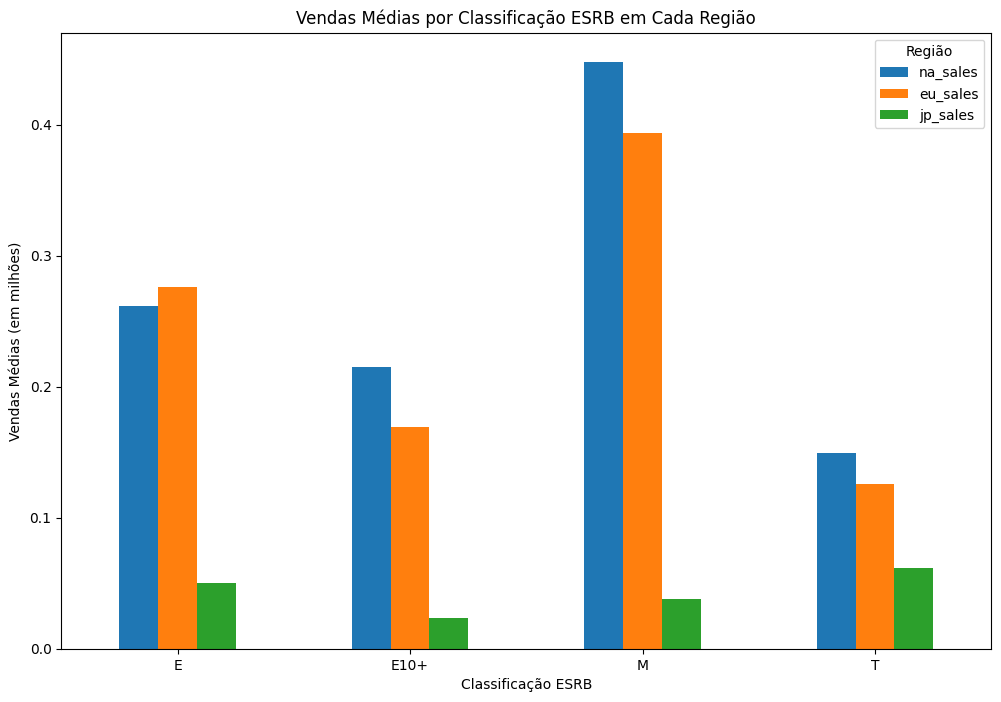

In [40]:
rating_sales = games_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].mean()#Calculando as vendas médias por classificação ESRB em cada região


rating_sales.plot(kind='bar', figsize=(12, 8))
plt.title('Vendas Médias por Classificação ESRB em Cada Região')
plt.xlabel('Classificação ESRB')
plt.ylabel('Vendas Médias (em milhões)')
plt.legend(title='Região')
plt.xticks(rotation=0)
plt.show() # Plotando as vendas médias por classificação ESRB em cada região


O gráfico prova que jogos exclusivos para a idade mais adulta são os mais vendidos, podendo levantar algumas razões para tal feito como por exemplo, jogos de ação e esportes são os gêneros mais vendidos. Os de ação, principalmente, são de classificação *Mature* por seu conteúdo mais violento. Entretanto, jogos com classificação *Everyone* e *Everyone 10+* aparecem logo em seguida, que mostra que crianças e jogos para toda a família possuem forte influência em vendas.  

In [41]:
rating_correlation = games_df[['rating', 'na_sales', 'eu_sales', 'jp_sales']].copy() #Calculando a correlação entre as vendas e as classificações do ESRB em cada região
rating_correlation['rating'] = rating_correlation['rating'].astype('category').cat.codes  #Convertendo classificações ESRB para códigos numéricos
correlations = rating_correlation.corr()

In [42]:
print("Correlações entre Classificações do ESRB e Vendas em Regiões Individuais:")
print(correlations.loc['rating', ['na_sales', 'eu_sales', 'jp_sales']])

Correlações entre Classificações do ESRB e Vendas em Regiões Individuais:
na_sales    0.131413
eu_sales    0.115516
jp_sales   -0.066173
Name: rating, dtype: float64


Sabemos que a correlação pode variar entre -1 (relação negativa perfeita) e 1 (relação positiva perfeita), com 0 indicando nenhuma correlação.
Na análise acima, percebemos que as correlações são fracas (tanto positivas quanto negativas), e indicam que as classificações ESRB não têm um impacto significativo nas vendas de jogos em nenhuma das regiões.

# Formulação das Hipóteses

Sendo a hipótese nula é uma afirmação de que não há efeito ou diferença, e a hipótese alternativa afirma que existe uma diferença nas classificações médias dos usuários entre jogos de ação e jogos de esportes. Logo, as hipóteses foram formuladas dessa forma: 

Hipótese Nula (H0): A média das classificações dos usuários para jogos de ação é igual à média das classificações dos usuários para jogos de esportes.

Hipótese Alternativa (HA): A média das classificações dos usuários para jogos de ação é igual à média das classificações dos usuários para jogos de esportes.

Para os critérios escolhidos para testar as hipóteses, foi utilizado o teste t de duas amostras independentes para comparar as médias das classificações dos usuários entre os dois grupos e um nível de significância α=0.05, por ser um padrão comum em testes estatísticos. Isso significa que estamos dispostos a aceitar uma probabilidade de 5% de cometer um erro.

Se p≤α: Rejeitamos a hipótese nula, e concluímos que há uma diferença estatisticamente significativa entre as classificações médias dos usuários para jogos de ação e jogos de esportes.

Se p>α: Não rejeitamos a hipótese nula, e assim não há evidência suficiente para afirmar que existe uma diferença significativa entre as classificações médias dos usuários.

# Testando Hipóteses

Para realizar a análise de significância estatística, precisamos definir um valor de limiar alfa. O valor alfa (
𝛼) é a probabilidade de rejeitar a hipótese nula (de que não há diferença) quando ela é verdadeira. Um valor comumente usado para alfa é 0.05 (5%), o que significa que aceitamos uma probabilidade de 5% de cometer um erro tipo I (falso positivo).

In [43]:
games_df = games_df.dropna(subset=['year_of_release'])
games_df = games_df[(games_df['year_of_release'] >= 2013) & (games_df['year_of_release'] <= 2016)]

xbox_one_ratings = games_df[games_df['platform'] == 'XOne']['user_score'] # Testando as hipóteses
pc_ratings = games_df[games_df['platform'] == 'PC']['user_score']

# Definir a hipótese nula e alternativa
# Hipótese nula: A média das classificações dos usuários para as plataformas XBox One e PC são iguais.
# Hipótese alternativa: A média das classificações dos usuários para as plataformas XBox One e PC são diferentes.

variance_xbox_one = xbox_one_ratings.var()
variance_pc = pc_ratings.var() #Calculando variâncias
print("Variância da classificação para a plataforma Xbox One:", variance_xbox_one)
print("Variância da classificação para a plataforma PC:", variance_pc)


results = stats.ttest_ind(xbox_one_ratings, pc_ratings, nan_policy='omit', equal_var=False) #Realizando o teste t


mean_xbox_one = xbox_one_ratings.mean()
mean_pc = pc_ratings.mean() # Calculando as classificações médias para confirmação

print(f"Classificação Média dos Usuários para Xbox One: {mean_xbox_one}")
print(f"Classificação Média dos Usuários para PC: {mean_pc}")


alpha = 0.05


print('valor-p: ', results.pvalue) # imprimindo o valor-p resultante

if (results.pvalue < alpha):
    print('Rejeitamos a hipótese nula.')
else:
    print('Não podemos rejeitar a hipótese nula.')
 #Verificando se a diferença é estatisticamente significativa

Variância da classificação para a plataforma Xbox One: 1.9069968429360695
Variância da classificação para a plataforma PC: 3.035892752408881
Classificação Média dos Usuários para Xbox One: 6.521428571428572
Classificação Média dos Usuários para PC: 6.269677419354839
valor-p:  0.1475959401343032
Não podemos rejeitar a hipótese nula.


Embora a média das classificações dos usuários para Xbox One seja um pouco maior do que para PC, essa diferença não é estatisticamente significativa ao nível de 0.05. Portanto, não podemos afirmar com confiança que os usuários avaliam jogos de Xbox One de maneira diferente dos jogos de PC com base nas classificações médias dos usuários. Fatores contextuais, como as preferências dos jogadores, a biblioteca de jogos e a experiência de jogo, também desempenham um papel importante na compreensão dessa diferença.

In [44]:
games_df = games_df.dropna(subset=['year_of_release'])
games_df = games_df[(games_df['year_of_release'] >= 2013) & (games_df['year_of_release'] <= 2016)]


action_ratings = games_df[games_df['genre'] == 'Action']['user_score'] # Testando as hipóteses
sports_ratings = games_df[games_df['genre'] == 'Sports']['user_score']

# Definir a hipótese nula e alternativa
# Hipótese nula: A média das classificações dos usuários para os gêneros 'Action' e 'Sports' são iguais.
# Hipótese alternativa: A média das classificações dos usuários para os gêneros 'Action' e 'Sports' são diferentes.


variance_action = action_ratings.var()
variance_sports = sports_ratings.var()# Calcular variâncias
print("Variância da classificação para o gênero 'Action':", variance_action)
print("Variância da classificação para o gênero 'Sports':", variance_sports)


results = stats.ttest_ind(action_ratings, sports_ratings, nan_policy='omit', equal_var=False) #Realizando o teste t

action_mean = action_ratings.mean()
sports_mean = sports_ratings.mean() # Calculando as classificações médias para confirmação

print(f"Classificação Média dos Usuários para jogos de ação: {action_mean}")
print(f"Classificação Média dos Usuários para jogos de esportes: {sports_mean}")


alpha = 0.05

print('valor-p: ', results.pvalue) # imprimindo o valor-p resultante

if (results.pvalue < alpha):
    print('Rejeitamos a hipótese nula.')
else:
    print('Não podemos rejeitar a hipótese nula.') #Verificando se a diferença é estatisticamente significativa

Variância da classificação para o gênero 'Action': 1.7693609042482705
Variância da classificação para o gênero 'Sports': 3.180612814465409
Classificação Média dos Usuários para jogos de ação: 6.837532133676093
Classificação Média dos Usuários para jogos de esportes: 5.238124999999999
valor-p:  1.4460039700703482e-20
Rejeitamos a hipótese nula.


Apesar da diferença observada nas classificações médias, onde jogos de ação são melhor avaliados do que jogos de esportes, a análise estatística sugere que essa diferença não é estatisticamente significativa ao nível de 0.05. Isso significa que, com base nos dados disponíveis, não podemos afirmar com confiança que os usuários avaliam jogos de ação de maneira diferente dos jogos de esportes.

Sendo assim, o resultado dos testes foram que a diferença nas classificações médias não são estatisticamente significativa, portanto não rejeitamos a hipótese nula.

# Conclusão Geral

As vendas variam significativamente entre plataformas, com algumas plataformas dominando o mercado em regiões específicas, como América do Norte, Europa e Japão. 

As correlações entre as classificações ESRB e as vendas nas regiões NA, EU e JP foram baixas, indicando que as classificações ESRB têm um impacto limitado nas vendas. As classificações dos usuários e críticos têm um impacto perceptível nas vendas, especialmente para plataformas populares. As correlações e análises de regressão realizadas indicam que melhores classificações geralmente correspondem a maiores vendas.

Os resultados deste projeto possui informações e conclusões valiosas para a indústria de jogos eletrônicos que podem ser utilizados para criar estratégias de lançamento e marketing, melhorar a qualidade e o apelo dos jogos com base no feedback dos usuários e críticos, compreender a dinâmica de consumo em cada região, e assim possibilitando que ações estratégicas de vendas sejam aplicada direcionadas para populações diferentes. 

